In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.spatial.distance import cdist
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

In [3]:
USER_NAME = u"Кашипов".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)
def sigmoid(z): 
    return 1./(1+np.exp(-z))
sigmoid_v = np.vectorize(sigmoid)
print sigmoid(9)
np.hstack((sigmoid_v(np.arange(-10,10,1).reshape(-1,1)),np.arange(-10,10,1).reshape(-1,1),\
           np.log(sigmoid_v(np.arange(-10,10,1).reshape(-1,1)))))

Имплементируйте обучение логистической регрессии с L1 регуляризацией с помощью метода  Stochastic Gradient Descent (SGD)
0.999876605424


array([[  4.53978687e-05,  -1.00000000e+01,  -1.00000454e+01],
       [  1.23394576e-04,  -9.00000000e+00,  -9.00012340e+00],
       [  3.35350130e-04,  -8.00000000e+00,  -8.00033541e+00],
       [  9.11051194e-04,  -7.00000000e+00,  -7.00091147e+00],
       [  2.47262316e-03,  -6.00000000e+00,  -6.00247569e+00],
       [  6.69285092e-03,  -5.00000000e+00,  -5.00671535e+00],
       [  1.79862100e-02,  -4.00000000e+00,  -4.01814993e+00],
       [  4.74258732e-02,  -3.00000000e+00,  -3.04858735e+00],
       [  1.19202922e-01,  -2.00000000e+00,  -2.12692801e+00],
       [  2.68941421e-01,  -1.00000000e+00,  -1.31326169e+00],
       [  5.00000000e-01,   0.00000000e+00,  -6.93147181e-01],
       [  7.31058579e-01,   1.00000000e+00,  -3.13261688e-01],
       [  8.80797078e-01,   2.00000000e+00,  -1.26928011e-01],
       [  9.52574127e-01,   3.00000000e+00,  -4.85873516e-02],
       [  9.82013790e-01,   4.00000000e+00,  -1.81499279e-02],
       [  9.93307149e-01,   5.00000000e+00,  -6.7153484

In [4]:
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print a
print shuffle(a,random_state = 10)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [7 8 9]
 [4 5 6]]


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту, т.е. в алгоритме надо
    * Перемешать выборку
    * Посчтитать градиент на одном объекте
    * Сделать шаг спуска
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Почитать градиент по мини батчам
    * Сделать шаг спуска
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в обучающей выборке (тем или иным способом)

### Примечание для случая L1-регуляризации:

При расчете производной по функции потерь
$$ L(w_0,w_1,\dots) = - \frac{1}{N}\left[\sum_i \log(\sigma(y^{(i)} g(x^{(i)}))\right] + \frac{1}{C}\sum_{j=1}^{m}|w_j| $$
могут возникнуть сомнения по поводу производной части с модулями. 

Вам на выбор предлагаются следующией варианты:
* Считать субградиент $\partial|w_j| = sign(w_j)$ (проще, но с большой вероятностью не приведет к занулению коэффициентов)
* Метод SGD-Clipping из [статьи](https://www.aclweb.org/anthology/P/P09/P09-1054.pdf) - раздел 3.1, страница 479, правая колонка снизу (чуть сложнее, но зато должно занулять)
* Cumulative Penalty из той же [статьи](https://www.aclweb.org/anthology/P/P09/P09-1054.pdf) - раздел 3.2

# Реализация модели

## Вывод правила обновления весов (1 балл)

Выведите правило обновления весов на каждом шаге алгоритма. Иными словами, посчитайте производную (градиент) функции потерь с регуляризацией. Формулы надо оформлять в формате LaTeX.
$$ L(w_0,w_1,\dots) =  \frac{1}{N}\left[\sum_i \log\frac{1}{\sigma(y^{(i)} g(x^{(i)})})\right] + \frac{1}{C}\sum_{i=1}^{m}|w_i| $$
$$ \frac{\partial L}{\partial w_j} = \frac{1}{N}\sum_{l=1}^{N}\sigma(y^{(i)} g(x^{(i)}))*e^{-y^{(i)} g(x^{(i)})}*(-y^{(i)} x^{(i)}_j)+\frac{1}{C}sign(w_j) $$

## Имплементация (5 баллов)

In [139]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.1, max_epoch=10, eps = 0.0000001, basic_b = 1, flag = True):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        self.eps = eps
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.basic_b = basic_b 
        self.flag = flag
    def fit(self, X, y):
        '''
        Обучение модели
        '''
        n = y.shape[0]
        
        
        new_x = np.zeros((X.shape[0],X.shape[1]+1),dtype = float)
        new_x[:,0] = 1
        new_x[:,1:]+=X
         # для predict_prob
        Beta = np.zeros((new_x.shape[1],1),dtype = float)+self.basic_b
        costs = []
        Betas = [Beta]
        if (self.flag):
            cost_epoch = (-1.0/new_x.shape[0])*np.sum(np.log(sigmoid_v(  y.reshape(-1,1)*(new_x.dot(Beta))  )))\
            +(1.0/self.C*np.abs(Beta)).sum()
            costs.append(cost_epoch)
        for i in xrange(self.max_epoch):
            print "number of epoch",i
            new_x, y = shuffle(new_x, y, random_state=10)
        
            g_x = new_x.dot(Beta)
            y_g = sigmoid_v(y.reshape(-1,1)*g_x)*np.exp(-y.reshape(-1,1)*g_x)*(-y.reshape(-1,1)*(new_x))
            for j in xrange(new_x.shape[0]):
                if (j % 10000)==0:
                    print j
                # обновляем коэффициенты
                Beta_old = np.copy(Beta)
                Beta-= (self.alpha*(y_g[j].reshape(-1,1)+(1.0/self.C)*np.sign(Beta)))
                #print cdist(Beta_old.reshape(1,-1),Beta.reshape(1,-1),metric='euclidean')
                if (cdist(Beta_old.reshape(1,-1),Beta.reshape(1,-1),metric='euclidean')<self.eps):
                    print "Сработало Eps"
                    print "i =",i,"j =",j
                    Betas.append(Beta)
                    if (self.flag):
                        cost_epoch = (-1.0/new_x.shape[0])*np.sum(np.log(sigmoid_v(y.reshape(-1,1)*new_x.dot(Beta))))\
                        +(1.0/self.C*np.abs(Beta)).sum()
                        costs.append(cost_epoch)
                    return Beta, costs, Betas
                # записываем историю весов
                if j%5 and i % 5 == 0:
                    Betas.append(Beta)
                # записываем значения невязки
                if (self.flag):
                    cost_epoch = (-1.0/new_x.shape[0])*np.sum(np.log(sigmoid_v(y.reshape(-1,1)*new_x.dot(Beta))))\
                    +(1.0/self.C*np.abs(Beta)).sum()
                    costs.append(cost_epoch)
            self.alpha *= 0.99
            
           
        
        self.Beta=Beta
        return Beta, costs, Betas
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        y = np.dot(X,self.Beta[1:])+self.Beta[0]
        if (y>0):
            y_hat = 1
        else:
            if (y<0):
                y_hat = 0
            else:
                y_hat = -1
        return y_hat
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        ''' 
        y_hat_proba = dict()
        
        if X.dot(self.Beta)<0:
            y_hat_proba["-1"]=sigmoid(np.abs(X.dot(self.Beta)))
            y_hat_proba["1"]=1-sigmoid(np.abs(X.dot(self.Beta)))
        else:
            y_hat_proba["1"]=sigmoid(np.abs(X.dot(self.Beta)))
            y_hat_proba["-1"]=1-sigmoid(np.abs(X.dot(self.Beta)))
        return y_hat_proba

## Проверка на синтетических данных (1 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

In [140]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]
y[y==0]=-1
print y


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1

In [141]:
C=1000
a = MySGDClassifier(max_epoch = 150, alpha = 0.01,C=C)
Beta,costs,Betas = a.fit(X,y)
print "Веса =",Beta.reshape(1,-1)
print "Значение погрешности =",costs
l = np.arange(-5,9,1)

number of epoch 0
0
number of epoch 1
0
number of epoch 2
0
number of epoch 3
0
number of epoch 4
0
number of epoch 5
0
number of epoch 6
0
number of epoch 7
0
number of epoch 8
0
number of epoch 9
0
number of epoch 10
0
number of epoch 11
0
number of epoch 12
0
number of epoch 13
0
number of epoch 14
0
number of epoch 15
0
number of epoch 16
0
number of epoch 17
0
number of epoch 18
0
number of epoch 19
0
number of epoch 20
0
number of epoch 21
0
number of epoch 22
0
number of epoch 23
0
number of epoch 24
0
number of epoch 25
0
number of epoch 26
0
number of epoch 27
0
number of epoch 28
0
number of epoch 29
0
number of epoch 30
0
number of epoch 31
0
number of epoch 32
0
number of epoch 33
0
number of epoch 34
0
number of epoch 35
0
number of epoch 36
0
number of epoch 37
0
number of epoch 38
0
number of epoch 39
0
number of epoch 40
0
number of epoch 41
0
number of epoch 42
0
number of epoch 43
0
number of epoch 44
0
number of epoch 45
0
number of epoch 46
0
number of epoch 47
0
nu

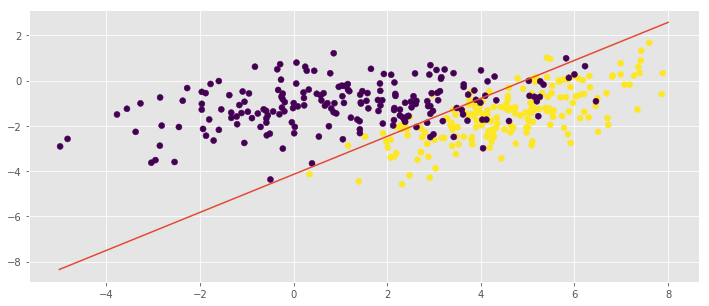

In [142]:
l_y = (-Beta[0]-Beta[1]*l)/Beta[2]
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(l, l_y)

0.306003031378


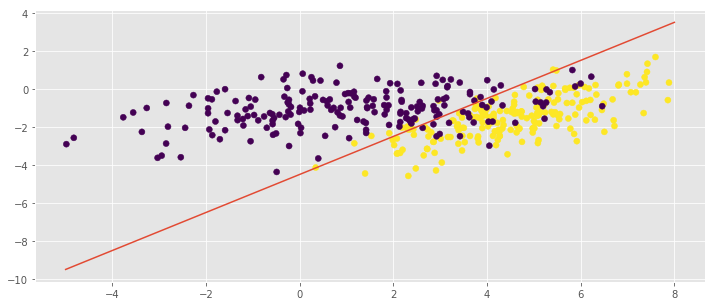

In [110]:
new_x = np.zeros((X.shape[0],X.shape[1]+1))
new_x[:,0] = 1
new_x[:,1:]+=X
Beta[0]=-4.5
Beta[1]=1
Beta[2]=-1
cost_epoch = (-1.0/new_x.shape[0])*np.sum(np.log(sigmoid_v(y.reshape(-1,1)*new_x.dot(Beta))))\
+(1.0/C*np.abs(Beta)).sum()
print cost_epoch
l_y = (-Beta[0]-Beta[1]*l)/Beta[2]
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(l, l_y)


In [73]:
vector = sigmoid_v(new_x.dot(Beta)*y.reshape(-1,1)).reshape(new_x.shape[0],)
print vector.shape
mean = vector>0.5
index = np.where(mean)
print len(index[0])
mean = vector<0.5
index = np.where(mean)
print len(index[0])


vector = sigmoid_v(new_x.dot(Beta)*y.reshape(-1,1)).reshape(new_x.shape[0],)
print vector.shape
mean = vector>0.5
index = np.where(mean)
print "кол-во совпавших",len(index[0])
mean = vector<0.5
index = np.where(mean)
print "наоборот",len(index[0])

(400,)
356
44
(400,)
кол-во совпавших 356
наоборот 44


In [74]:
Beta[0]=4.5
Beta[1]=-1
Beta[2]=1
vector = sigmoid_v(new_x.dot(Beta)*y.reshape(-1,1)).reshape(new_x.shape[0],)
print vector.shape
mean = vector>0.5
index = np.where(mean)
print "кол-во совпавших",len(index[0])
mean = vector<0.5
index = np.where(mean)
print "наоборот",len(index[0])

(400,)
кол-во совпавших 44
наоборот 356


## Анализ сходимости (2 балла)

Для следующих заданий используйте датасет ниже

In [111]:
from sklearn.datasets import make_classification

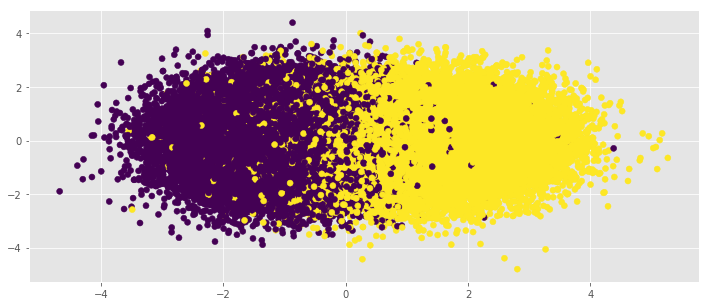

In [143]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
y[y==0]=-1
plt.scatter(X[:,5], X[:,1], c=y)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

Есть такой очень долго работает:

[ 0.02  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.18  0.2   0.22  0.24
  0.26  0.28  0.3 ]
0
number of epoch 0
0
Сработало Eps
i = 0 j = 5
1
number of epoch 0
0
Сработало Eps
i = 0 j = 7
2
number of epoch 0
0
Сработало Eps
i = 0 j = 7
3
number of epoch 0
0
Сработало Eps
i = 0 j = 7
4
number of epoch 0
0
Сработало Eps
i = 0 j = 7
5
number of epoch 0
0
Сработало Eps
i = 0 j = 7
6
number of epoch 0
0
Сработало Eps
i = 0 j = 7
7
number of epoch 0
0
Сработало Eps
i = 0 j = 7
8
number of epoch 0
0
Сработало Eps
i = 0 j = 7
9
number of epoch 0
0
Сработало Eps
i = 0 j = 7
10
number of epoch 0
0
Сработало Eps
i = 0 j = 7
11
number of epoch 0
0
Сработало Eps
i = 0 j = 7
12
number of epoch 0
0
Сработало Eps
i = 0 j = 7
13
number of epoch 0
0
Сработало Eps
i = 0 j = 7
14
number of epoch 0
0
Сработало Eps
i = 0 j = 7


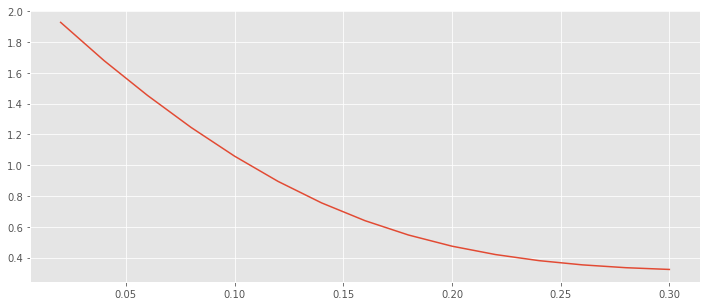

In [104]:
alpha=0.02
p = np.zeros((15,))
k = (np.arange(15, dtype = float)*0.02+0.02)
print k
for i in xrange(15):
    print i
    a = MySGDClassifier(alpha=alpha,C=1000, eps = 0.01)
    Beta,costs,Betas = a.fit(X,y)
    #print costs
    p[i] = costs[-1]
    alpha+=0.02
plt.plot(k,p)

## Эффект регуляризации (2 балла)

Изобразите значения коэффициентов модели для каждого С из `np.logspace(3, -3, 10)` (желательно на одном и том же графике)

Возникает проблема при маленьких С. В месте, когда я присваиваю весам новые значения, и при этом некоторым весам основные изменения вносит именно слагаемое:
$$\frac1{C}*sign(w_j)$$ 
То есть С малое, изменения некоторых весов крупные и при вычисление новых значений производной происходит выход за пределы памяти или что-то в этом роде... 
 НО Я ПОИГРАЛСЯ С ПАРАМЕТРАМИ, КОТОРЫЕ ПЕРЕДАЮТСЯ И ПОЛУЧИЛ ТО, ЧТО ПОЛУЧИЛ.

In [163]:
alpha=0.0003
k = np.logspace(3,-3,10)
print k
p = np.zeros((k.shape[0],X.shape[1]+1))
for i in xrange(k.shape[0]):
    print i
    a = MySGDClassifier(alpha=alpha,C=k[i],eps = 0.00000001,basic_b = 10, flag=False)
    Beta,costs,Betas = a.fit(X,y)
    p[i]=Beta.reshape(1,-1)
    print p[i]

[  1.00000000e+03   2.15443469e+02   4.64158883e+01   1.00000000e+01
   2.15443469e+00   4.64158883e-01   1.00000000e-01   2.15443469e-02
   4.64158883e-03   1.00000000e-03]
0
number of epoch 0
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 1
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 2
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 3
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 4
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 5
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 6
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 7
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 8
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 9
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
[  8.94714869   2.85677822   3.08103021   2.59127702 -13.14678738
  -3.84471501  20.

40000
50000
60000
70000
80000
90000
[-0.04167952 -0.03875452  0.00552564  0.02129847 -0.04879587 -0.05215994
 -0.01693719  0.02895891 -0.04594972  0.00968373  0.036173  ]
9
number of epoch 0
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 1
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 2
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 3
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 4
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 5
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 6
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 7
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 8
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
number of epoch 9
0
10000
20000
30000
40000
50000
60000
70000
80000
90000
[ 0.20556803 -0.05580024  0.16711106 -0.03291921  0.07103792 -0.1917687
  0.071896    0

11


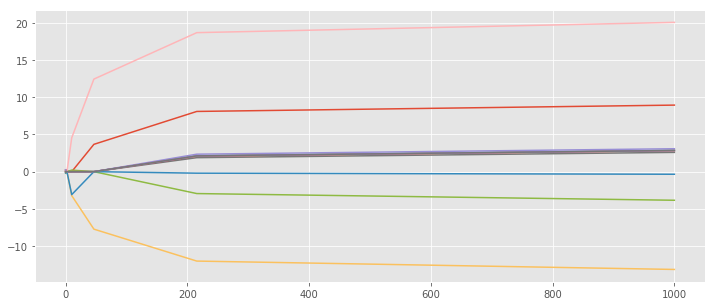

In [164]:
print Beta.shape[0]

for i in xrange(Beta.shape[0]):
    plt.plot(k[::-1],p[::-1,i])

Суть понятна, при крупных С значение весов крупнее

# Боевое применение

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

## Данные

Обучающую выборку и тестовую выборку с ответами можно скачать [отсюда](https://cloud.mail.ru/public/BEon/4Rrdqqvng)

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если все данные не будут помещаться вам с оперативную память, то можете использовать один из 4х файлов для обучения

In [244]:
# Загрузка данных целиком
df_list = []
for chunk in range(1,5):
    filepath = './trainingData_tabular_chunk%d.csv' % chunk
    df_list.append(pd.read_csv(filepath, sep=','))
df_data = pd.concat(df_list)

# Загрузка одной части данных
# filepath = './trainingData_tabular_chunk1.csv'
# df_data = pd.read_csv(filepath, sep=',')

In [245]:
df_data.shape
df_data.head()

,gamestate_id,decision,turn,opponent.armor,opponent.attack,opponent.hero_card_id,opponent.hp,opponent.special_skill_used,opponent.weapon_durability,opponent.crystals_all,...,player.played.hp_current,player.played.hp_max,player.hand.nOfMinions,player.hand.nOfSpells,player.hand.nOfWeapons,player.hand.nOfCards,player.hand.nOfPlayable,player.hand.attack,player.hand.crystals_cost,player.hand.hp
0,4687346.0,1,14,0,0,798,5,0,0,10,...,20,23,4,0,1,5,0,20,22,17
1,3270826.0,1,7,0,0,754,22,0,0,6,...,16,17,3,2,2,7,0,17,26,20
2,3189487.0,1,5,3,0,612,29,0,0,4,...,0,0,5,0,0,5,2,26,28,27
3,4098946.0,1,8,0,0,390,26,0,0,7,...,2,2,7,1,1,9,9,36,44,36
4,2661127.0,0,13,0,0,25,30,0,0,10,...,7,7,4,0,0,4,4,13,13,14


In [246]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [247]:
df_data.head().T

gamestate_id,4687346.0,3270826.0,3189487.0,4098946.0,2661127.0
decision,1,1,1,1,0
turn,14,7,5,8,13
opponent_armor,0,0,3,0,0
opponent_attack,0,0,0,0,0
opponent_hero_card_id,798,754,612,390,25
opponent_hp,5,22,29,26,30
opponent_special_skill_used,0,0,0,0,0
opponent_weapon_durability,0,0,0,0,0
opponent_crystals_all,10,6,4,7,10
opponent_crystals_current,10,6,1,7,1


In [248]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

0.50479949999999996

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощью one-hot кодирования, добавьте к датасету и удалите прежние столбцы


In [191]:
## Youd Code Here
opp_cards = np.unique(df_data['opponent_hero_card_id'])
print "Opponent cards count ",len(opp_cards)
_cards = np.unique(df_data['player_hero_card_id'])
print "Player cards count",len(_cards)

Opponent cards count  9
Player cards count 9


In [268]:
a = OneHotEncoder()
b = a.fit(df_data['opponent_armor'].values.reshape(-1,1))
print type(b)
#for i in xrange(b.shape[1]):
#    df_data.loc[:,'opponent_armor_%d'%i] = pd.Series([0], index = df_data.index)
#    df_data.loc[:,'opponent_armor_%d'%i] = pd.Series(b[:,i], index = df_data.index)

print df_data.T

<class 'sklearn.preprocessing.data.OneHotEncoder'>
gamestate_id                   4687346.0  3270826.0  3189487.0  4098946.0  \
decision                               1          1          1          1   
turn                                  14          7          5          8   
opponent_armor                         0          0          3          0   
opponent_attack                        0          0          0          0   
opponent_hero_card_id                798        754        612        390   
opponent_hp                            5         22         29         26   
opponent_special_skill_used            0          0          0          0   
opponent_weapon_durability             0          0          0          0   
opponent_crystals_all                 10          6          4          7   
opponent_crystals_current             10          6          1          7   
opponent_deck_count                   11         19         22         17   
opponent_fatigue_damage  

In [272]:
print b==

auto


In [209]:
df_data['opponent_armor']

gamestate_id
4687346.0    0
3270826.0    0
3189487.0    3
4098946.0    0
2661127.0    0
2993360.0    0
4378268.0    0
3774658.0    0
3956442.0    2
2958739.0    0
4018123.0    0
3089963.0    0
1638805.0    0
1366022.0    0
3480881.0    0
1158272.0    0
1701607.0    0
1323366.0    0
4784039.0    0
1189022.0    0
4774365.0    0
4800725.0    0
4894058.0    0
4666572.0    0
4576900.0    0
2292198.0    0
4857990.0    0
2148632.0    0
4398284.0    0
2782636.0    0
            ..
1225753.0    0
2176520.0    0
2904038.0    0
1626661.0    0
2299976.0    0
4828116.0    0
1810879.0    5
3382438.0    0
4590343.0    0
4087032.0    0
2676289.0    0
3852613.0    0
4556744.0    0
2022467.0    0
4337632.0    0
4785690.0    0
1966628.0    0
3544395.0    0
3037543.0    0
2298722.0    0
1447350.0    0
4969097.0    0
2557505.0    0
3978779.0    0
3159355.0    0
4387577.0    0
3355721.0    9
3899879.0    0
2853512.0    3
4339805.0    0
Name: opponent_armor, Length: 2000000, dtype: int64

## Обучение модели (1 балл)

#### Задание

* Получите матрицу объект признак `X` и вектор целевого признака `y`
* Создайте Pipeline из `StandartScaller` и вашей модели
* Обучите модель (подбирать гиперпараметры можно без фанатизма)

In [ ]:
## Youd Code Here

## Применение модели (2 балла)
#### Задание
* Загрузите тестовые данные
* Подготовте их к подаче на вход в алгоритм
* Примените модель оцените качество с помощью меры ROC-AUC


In [ ]:
## Youd Code Here